In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from LLS import LLS

In [15]:
data = pd.read_csv("input/boston.csv")

data = data.drop(columns=["id"])
data.rename(columns={"medv": "price"}, inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
X = np.array([data["rm"], data["zn"]])
X = X.T

Y = np.array(data["price"])

X

array([[ 6.575, 18.   ],
       [ 6.421,  0.   ],
       [ 7.185,  0.   ],
       ...,
       [ 6.976,  0.   ],
       [ 6.794,  0.   ],
       [ 6.03 ,  0.   ]])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [19]:
lls = LLS()
lls.fit(x_train, y_train)

w = lls.w
print(w)

[3.45610661 0.10255216]


In [20]:
X1, X2 = x_train[:,0], x_train[:,1]
x1, x2 = np.meshgrid(X1, X2)
y_pred1, y_pred2 = w[0] * x1, w[1] * x2

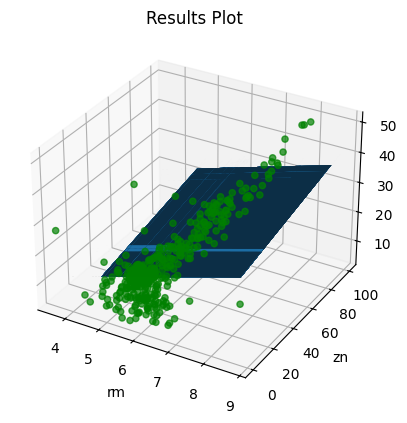

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X1 , X2 , y_train,  color="green",alpha=0.7)
ax.plot_surface(x1, x2,  y_pred1 + y_pred2)
ax.set_xlabel("rm")
ax.set_ylabel("zn")
ax.set_zlabel("price")
plt.title("Results Plot")
plt.show()